In [1]:
# Flattening: Corrects retinal curvature using a plynomial fit to reflective RPE layer.
# https://github.com/forihuelaespina/OCTant/blob/master/src/octant/op/OpScanFlatten.py
# https://github.com/forihuelaespina/OCTant/blob/master/src/octant/op/Operation.py

In [3]:
from abc import ABC, abstractmethod



## Class definition
class Operation(ABC):
    #Sphinx documentation
    """An abstract base class for operations on :class:`octant.data.OCTvolume` and :class:`octant.data_OCTscan` .

    An abstract base class for operations on :class:`octant.data.OCTvolume` and
    :class:`octant.data.OCTscan`.

    :Example:

        tmp = octant.data.OCTscan(img)
        o = octant.op.OpScanFlattening()
        o.addOperand(tmp)
        o.arity() #return 1
        o.execute() #Flattens the image


    :Known subclasses:

    * :class:`OpScanFlattening`
    * :class:`OpScanMeasureLayerThickness`
    * :class:`OpScanPerfilometer`
    * :class:`OpScanSegment`
    * :class:`OpScanStitch`
    * :class:`OpSegmentationBrush`
    * :class:`OpSegmentationEdit`

    .. seealso:: None
    .. note:: None
    .. todo::
        * Support to hold operand names.

    """




    #Private class attributes shared by all instances

    #Class constructor
    #
    def __init__(self,**kwargs):
        """The class constructor.

        The class constructor. Creates an empty operation

        """
        super().__init__()

        #Initialize attributes (without decorator @property)

        #Initialize properties (with decorator @property)
        self.name = 'Operation' #The operation name
        self.operands = list() #Operands
        self.parameters = list() #Parameters
        self.result = None #Operation outputs (a list in case it is multivalued).
                           #None until executed or cleared.

        if kwargs is not None:
            for key, value in kwargs.items():
                if (key=='name'):
                    self.name = value

        return

    #Properties getters/setters
    #
    # Remember: Sphinx ignores docstrings on property setters so all
    #documentation for a property must be on the @property method
    @property
    def operands(self): #operands getter
        """
        The list of operands.

        :getter: Gets the list of operands
        :setter: Sets the list of operands.
        :type: list
        """
        return self.__operands


    @operands.setter
    def operands(self,opList): #operands setter
        #if (not isinstance(opList,(list,))):
        if type(opList) is not list:
            warnMsg = self.getClassName() + ':operands: Unexpected type. ' \
                            'Please provide operands as a list.'
            warnings.warn(warnMsg,SyntaxWarning)
        else:
            self.__operands = opList;
        return None

    @property
    def name(self): #name getter
        """
        The operation name

        :getter: Gets the operation name
        :setter: Sets the operation name.
        :type: string
        """
        return self.__name

    @name.setter
    def name(self,opName): #name setter
        #if (not isinstance(opName,(str,))):
        if type(opName) is not str:
            warnMsg = self.getClassName() + ':name: Unexpected type. ' \
                            'Operations name must be a string.'
            warnings.warn(warnMsg,SyntaxWarning)
        else:
            self.__name = opName;
        return None


    @property
    def parameters(self): #operands getter
        """
        The list of parameters.

        :getter: Gets the list of parameters
        :setter: Sets the list of parameters.
        :type: list
        """
        return self.__parameters


    @parameters.setter
    def parameters(self,opList): #operands setter
        #if (not isinstance(opList,(list,))):
        if type(opList) is not list:
            warnMsg = self.getClassName() + ':parameters: Unexpected type. ' \
                            'Please provide operands as a list.'
            warnings.warn(warnMsg,SyntaxWarning)
        else:
            self.__parameters = opList;
        return None


    @property
    def result(self): #result getter
        """
        The list of results.

        This is a read only property. There is no setter method.

        :getter: Gets the list of results
        :setter: Sets the list of results
        :type: list
        """
        return self.__result


    @result.setter
    def result(self,rList): #result setter
        self.__result = rList;
        return None


    #Private methods
    def __str__(self):
        tmp = '['
        for x in self.operands:
            tmp += format(x) + ','
        tmp+=']'
        s = '<' + self.getClassName() + '([' \
            + 'name: ' + self.name + ';' \
            + ' operands: ' + tmp + '])>'
        return s

    #Public methods
    def getClassName(self):
        """Get the class name as a string.

        Get the class name as a string.

        :returns: The class name.
        :rtype: string
        """
        return type(self).__name__

    def addOperand(self,op,i=None):
        """
        Add a new operand.

        :param op: The operand.
        :type op: object
        :param i: (optional) The operand order. If given it may shift the
            order of other operands already set. If not given, the operand
            is appended at the end of the list of operands.
        :type op: int
        :return: None
        """
        if (i is None):
            self.__operands.append(op)
        else:
            self.__operands.insert(i,op)
        return None

    def setOperand(self,op,i):
        """
        Set an operand; substitutes an existing operand with a new one.

        Calling setOperand when the :py:attr:`i`-th operand has not been
        previously set will result in an out-of-range error.

        :param op: The new operand.
        :type op: object
        :param i: The operand order. Operand index is zero-base i.e. the
            first operand occupies i=0
        :type op: int
        :return: None
        """
        self.__operands[i] = op
        return None

    def addParameter(self,param,i=None):
        """
        Add a new parameter.

        :param op: The parameter.
        :type op: object
        :param i: (optional) The paremeter order. If given it may shift the
            order of other parameters already set. If not given, the parameter
            is appended at the end of the list of parameters.
        :type op: int
        :return: None
        """
        if (i is None):
            self.__parameters.append(op)
        else:
            self.__parameters.insert(i,op)
        return None

    def setParameter(self,op,i):
        """
        Set a parameter; substitutes an existing parameter with a new one.

        Calling setParameter when the :py:attr:`i`-th parameter has not been
        previously set will result in an out-of-range error.

        :param op: The new operand.
        :type op: object
        :param i: The operand order. Operand index is zero-base i.e. the
            first operand occupies i=0
        :type op: int
        :return: None
        """
        self.__operands[i] = op
        return None

    def arity(self):
        """Gets the operation arity (number of operands).

        :return: The operation arity
        :rtype: int
        """
        return len(self.__operands)

    def clear(self):
        """
        Clears the operands; Removes all operands.

        :return: None
        """
        self.__operands = list()
        return None

    #@abstractmethod
    def execute(self,*args,**kwargs):
        """Executes the operation on the operands.

        This is an abstract method. Executes the operation on the .operands
        and stores the outcome in .result

        Operation meta-parameters may be also passed.

        :returns: Result of executing the operation.
        :rtype: Type of result -depends on subclass implementation-.
        """
        pass

In [58]:
## Import
import warnings
#from deprecated import deprecated


import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from skimage import io, color

from scipy.optimize import curve_fit


## Class definition
class OpScanFlatten(Operation):
    """A flattening operation for :class:`data.OCTscan`.
    
    A flattening operation for :class:`data.OCTscan`.

    The operation represented by this class rectifies an OCT scan.
    
    .. seealso:: None
    .. note:: None
    .. todo:: None
        
    """
 
    #Private class attributes shared by all instances
    
    #Class constructor
    def __init__(self, image):
        #Call superclass constructor
        super().__init__()
        
        #Set the operation name
        self.name = "Flattening"
        
        self.__deformationMap = None
        
        self.image = image
        
        return
    
    
    @property
    def deformationMap(self): #name getter
        """
        A logical name for the study.
        
        This is a read only property.
        
        :getter: Gets the deformationMap associated to the last flattening.
        :type: str
        """
        return self.__deformationMap
    


    @staticmethod
    def fittingQuadraticModel(x, a, b, c):
        #quadratic model for curve optimization
        return a * x*x + b*x + c

    
    #Public methods
    def execute(self,*args,**kwargs):
        """Executes the operation on the :py:attr:`operands`.
        
        Executes the operation on the :py:attr:`operands` and stores the outcome
        in :py:attr:`result`. Preload operands using
        :func:`Operation.addOperand()`.
        
        :returns: Result of executing the operation.
        :rtype: :class:`data.OCTscan`
        """
        #print(self._getClasName(),": flattening: Starting flattening")
        
        #Ensure the operand has been set.
        
        
        
        #Check whether the image is in RGB (ndim=3) or in grayscale (ndim=2)
        #and convert to grayscale if necessary
        if self.image.ndim == 2:
            #Dimensions are only width and height. The image is already in grayscale.
            I2=self.image
        elif self.image.ndim == 3:
            #Image is in RGB. Convert.
            I2=color.rgb2gray(self.image);
        else: #Unexpected case. Return warning
            print(self._getClasName(),": Unexpected image shape.")
            self.result = self.image
            return self.result
        
        aux = np.argmax(I2, axis=0)
        mg = np.mean(aux)
        sdg = np.std(aux)
        markers = []
        remover =[]
        x0 = np.arange(len(aux))
        
        for i in range(0,len(aux)):
            if mg - 3*sdg <= aux[i] <= mg +3*sdg: 
                markers+= [aux[i]]
            else:
                remover+= [i]
                
        x=np.delete(x0,remover)
        
        
        
        modelCoeffs, pcov = curve_fit(self.fittingQuadraticModel, x, markers, \
                                    method = 'dogbox', loss = 'soft_l1')
        
        print(pcov)
        print(markers)
        
        a = self.fittingQuadraticModel(x0, *modelCoeffs)
        shift = np.max(a)
        flat  = shift-a
        flat  = np.round(flat)
        flat  = np.ravel(flat).astype(int)
        self.__deformationMap = flat
        
        newgray = I2
        for i in range(0,len(a)):
            newgray[:,i] = np.roll(I2[:,i], flat[i], axis=0)
        
        self.result = newgray
        return self.result


    def applyOperation(self, scanA):
        """Apply the current flattening to the given scan.
        
        Instead of calculating the fitting again needed for the
        flattening, this method applies a known fitted quadratic model to
        the given parameters.
        
        The result is NOT stored in :py:attr:`result`.
        
        :param scanA: Image to flatten.
        :type scanA: :class:`data.OCTscan`
        :returns: Result of repeating the last flattening operation onto
             parameter scanA.
        :rtype: :class:`data.OCTscan`
        """
            #scanA=scanA.data
        newgray = scanA
        for i in range(0,len(self.deformationMap)):
            newgray[:,i] = np.roll(scanA[:,i], self.deformationMap[i], axis=0)
        return newgray

Init testing...
Loading image.
-- Flattening.
[[ 5.80275204e-11 -2.48018546e-08  1.79198480e-06]
 [-2.48018546e-08  1.14111156e-05 -9.20560134e-04]
 [ 1.79198480e-06 -9.20560134e-04  9.64070564e-02]]
[31, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 41, 41, 43, 43, 43, 43, 44, 44, 45, 45, 46, 46, 46, 46, 48, 47, 47, 48, 49, 50, 50, 50, 51, 51, 52, 52, 53, 53, 53, 54, 54, 55, 55, 56, 56, 58, 58, 58, 58, 58, 60, 60, 59, 59, 61, 62, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 66, 66, 68, 68, 68, 68, 68, 69, 69, 70, 70, 70, 70, 71, 71, 71, 71, 72, 73, 73, 73, 74, 74, 74, 75, 75, 75, 75, 75, 75, 78, 77, 76, 76, 77, 77, 78, 78, 78, 79, 79, 79, 79, 79, 80, 80, 80, 80, 81, 81, 81, 81, 82, 83, 83, 83, 83, 83, 83, 84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 89, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 95, 95, 95, 96, 96,

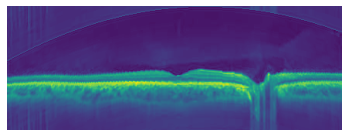

Done.


In [59]:
# Test.py
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.figure import Figure
#from matplotlib.backend_bases import KeyEvent, MouseEvent
from skimage import io

import copy #Permits deep copying objects

print("Init testing...")
print("Loading image.")
fileName = '../examples/example_data/eye/OCT/test1.JPG'
img = io.imread(fileName)
#scan = OCTscan(img);
#scanSegmentation = OCTscanSegmentation(scan);

print("-- Flattening.")
flt = OpScanFlatten(img)
imFlattened = flt.execute()

plt.imshow(imFlattened)
plt.axis('off')  # Optional: to turn off the axis
plt.show()
    

print("Done.")        

In [106]:
import cv2
import numpy as np

# load image as grayscale

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = (imFlattened * 255).astype(np.uint8)  

# threshold 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
hh, ww = thresh.shape

# make bottom 2 rows black where they are white the full width of the image
thresh[hh-3:hh, 0:ww] = 0

# get bounds of white pixels
white = np.where(thresh==255)
xmin, ymin, xmax, ymax = np.min(white[1]), np.min(white[0]), np.max(white[1]), np.max(white[0])
print(xmin,xmax,ymin,ymax)

# crop the image at the bounds adding back the two blackened rows at the bottom
crop = gray[ymin:ymax+3, xmin:xmax]

resized = cv2.resize(crop, (250, 250))

0 433 81 148


109


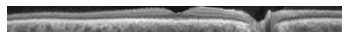

In [107]:
"""

#Check whether the image is in RGB (ndim=3) or in grayscale (ndim=2)
#and convert to grayscale if necessary
if gray.ndim == 2:
    #Dimensions are only width and height. The image is already in grayscale.
    I2=gray
elif gray.ndim == 3:
    #Image is in RGB. Convert.
    I2=color.rgb2gray(gray);


aux = np.argmax(I2, axis=0)
mg = np.mean(aux)
sdg = np.std(aux)
markers = []
remover =[]
x0 = np.arange(len(aux))

for i in range(0,len(aux)):
    if mg - 3*sdg <= aux[i] <= mg +3*sdg: 
        markers+= [aux[i]]
    else:
        remover+= [i]

x=np.delete(x0,remover)

m = int(np.max(markers))
print(m)

crop = gray[ymin:m+5, xmin:xmax]

plt.imshow(crop, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

resized = cv2.resize(crop, (250, 250))

"""

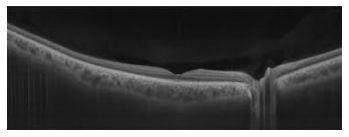

In [108]:
plt.imshow(img, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

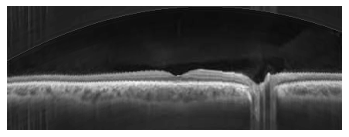

In [109]:
plt.imshow(imFlattened, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

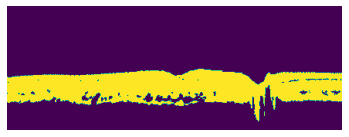

In [110]:
plt.imshow(thresh)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

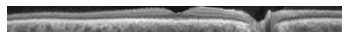

In [111]:
plt.imshow(crop, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

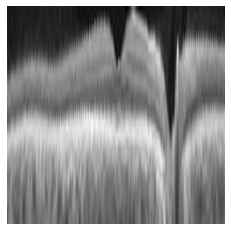

In [112]:
plt.imshow(resized, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()